In [1]:
!pip install tweet-preprocessor
import pandas as pd
import numpy as np
import preprocessor

def preprocess_tweet(row):
    text = row['Text']
    text = preprocessor.clean(text)
    return text
    
data = pd.read_csv('C:/Users/14848/Downloads/twittersentiment/stock_data.csv')

data['Text_Cleaned'] = data.apply(preprocess_tweet, axis=1)
display(data)

,Text,Sentiment,Text_Cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: AAP MOVIE. % return for the FEA/GEED ind...
2,user I'd be afraid to short AMZN - they are lo...,1,user I'd be afraid to short AMZN - they are lo...
3,MNTA Over 12.00,1,MNTA Over
4,OI Over 21.37,1,OI Over
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,Industry body CII said are likely to suffer a ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,prices slip below Rs as book profits amid -led...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a % wage ...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,"LIVE: Sensex off days high, up points, tests ,..."


In [3]:
import nltk
import ssl

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

data['Vader_Scores'] = data['Text_Cleaned'].apply(lambda score: sid.polarity_scores(score)['compound'])
data['Vader_Prediction'] = data['Vader_Scores'].apply(lambda score: 1 if score >=0 else -1)

print('Vader Accuracy:', round((len(data[data['Sentiment']==data['Vader_Prediction']])/len(data)) *100, 2), '%', '\n')

Vader Accuracy: 66.47 % 



In [4]:
import nltk
from nltk.corpus import stopwords

StopWords = set([s.replace("'", '') for s in stopwords.words('english') if s not in ['not', 'up', 'down', 'above', 'below', 'under', 'over']])
print(StopWords)

data['Text_Processed'] = data['Text_Cleaned'].apply(lambda s: " ".join([word for word in s.split() if word not in StopWords]))
data['Text_Processed'] = data['Text_Processed'].str.strip()

display(data)

{'ourselves', 'd', 'wouldn', 'can', 'a', 'with', 'itself', 'was', 'few', 'youd', 'an', 'wasn', 'no', 'isnt', 'each', 'didn', 'myself', 'mustnt', 'more', 'couldn', 'youre', 'than', 'hadn', 'thatll', 'she', 'this', 'until', 'm', 'yours', 'off', 'am', 'where', 'while', 'yourself', 'i', 'such', 'here', 'at', 'own', 'hasnt', 'neednt', 'has', 'what', 'were', 'out', 'shouldn', 'who', 'your', 'these', 'been', 'both', 'that', 'youll', 'wont', 'any', 'from', 'ma', 'youve', 'through', 'have', 'll', 'her', 'on', 'hasn', 'by', 'needn', 'further', 'between', 'being', 'dont', 'had', 'there', 'mightnt', 'werent', 's', 'haven', 'our', 'other', 'shant', 'but', 'why', 'now', 'all', 'again', 'shouldve', 'if', 'how', 'are', 'whom', 'of', 'herself', 'won', 'just', 'so', 'about', 'aren', 'in', 'for', 't', 'yourselves', 'doesnt', 'weren', 'he', 'we', 'does', 'should', 'or', 'wasnt', 'did', 'their', 'hers', 'mustn', 'those', 'my', 'me', 'his', 'because', 'to', 'ain', 'they', 'and', 'same', 'nor', 'too', 'into'

,Text,Sentiment,Text_Cleaned,Vader_Scores,Vader_Prediction,Text_Processed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,0.0000,1,Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: AAP MOVIE. % return for the FEA/GEED ind...,0.7034,1,user: AAP MOVIE. % return FEA/GEED indicator t...
2,user I'd be afraid to short AMZN - they are lo...,1,user I'd be afraid to short AMZN - they are lo...,0.3612,1,user I'd afraid short AMZN - looking like near...
3,MNTA Over 12.00,1,MNTA Over,0.0000,1,MNTA Over
4,OI Over 21.37,1,OI Over,0.0000,1,OI Over
...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,Industry body CII said are likely to suffer a ...,-0.7003,-1,Industry body CII said likely suffer net reven...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,prices slip below Rs as book profits amid -led...,0.0258,1,prices slip below Rs book profits amid -led fears
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a % wage ...,0.0000,1,Workers Bajaj Auto agreed % wage cut period Ap...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,"LIVE: Sensex off days high, up points, tests ,...",0.0000,1,"LIVE: Sensex days high, up points, tests , , p..."


Best alpha:  1.0   |  Best Score:  84.13


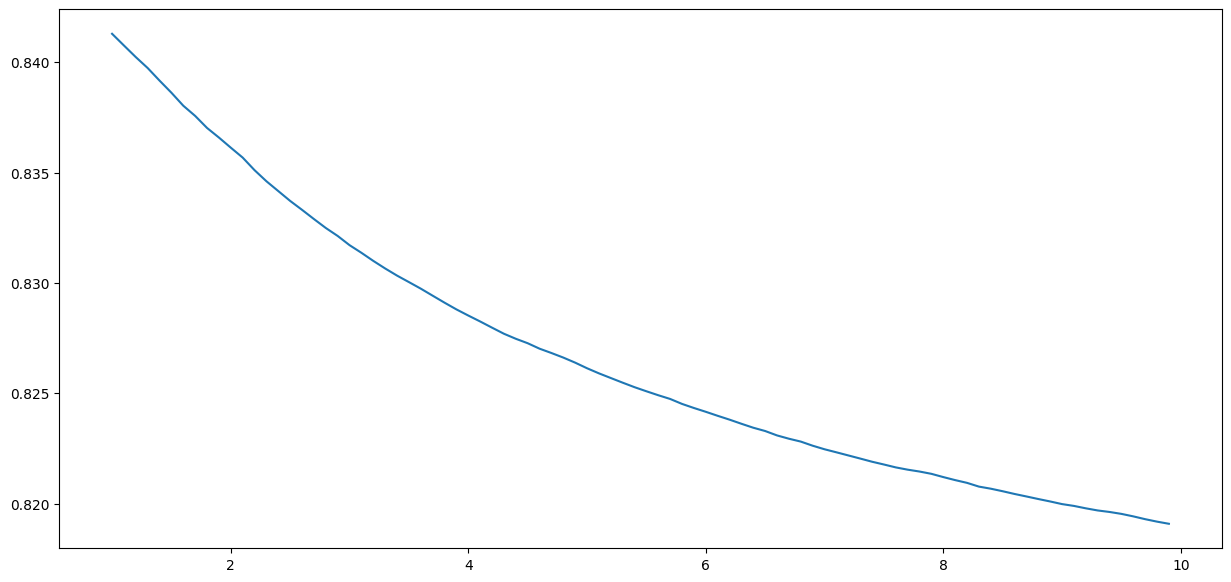

Naive-Bayes Accuracy: 70.23 %


In [7]:
!pip install scikit-learn
!pip install matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

train_pct = .8
idx = np.random.permutation(len(data))

X_train = data['Text_Processed'].values[idx[:int(train_pct*len(data))]]
y_train = data['Sentiment'].values[idx[:int(train_pct*len(data))]]
y_train[y_train==-1] = 0
X_test = data['Text_Processed'].values[idx[int(train_pct*len(data)):]]
y_test = data['Sentiment'].values[idx[int(train_pct*len(data)):]]
y_test[y_test==-1] = 0


tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)

X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)


def get_auc_CV(model):
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    auc = cross_val_score(model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

alphas = np.arange(1,10,0.1)
models = [MultinomialNB(alpha=i) for i in alphas]

accs = []
for model in models:
    accs.append(get_auc_CV(model))
    
accs = np.array(accs)

best_alpha = round(alphas[accs.argmax()], 1)

print('Best alpha: ', best_alpha, '  |  Best Score: ', round(accs.max()*100, 2))

plt.figure(figsize=(15,7))
plt.plot(alphas, accs)
plt.show()

best_model = MultinomialNB(alpha=best_alpha)
best_model.fit(X_train_tfidf, y_train)

probs = best_model.predict_proba(X_test_tfidf)

print('Naive-Bayes Accuracy:', round(len(np.where(y_test == probs.argmax(axis=1))[0])/len(probs) * 100, 2), '%')

In [5]:
from transformers import BertTokenizer, BertModel
from transformers import get_linear_schedule_with_warmup
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW
import pandas as pd
import numpy as np
import preprocessor

train_pct = .8
np.random.seed(1)
idx = np.random.permutation(len(data))

X_train = data['Text_Cleaned'].values[idx[:int(train_pct*len(data))]]
y_train = data['Sentiment'].values[idx[:int(train_pct*len(data))]]
y_train[y_train==-1] = 0
X_test = data['Text_Cleaned'].values[idx[int(train_pct*len(data)):]]
y_test = data['Sentiment'].values[idx[int(train_pct*len(data)):]]
y_test[y_test==-1] = 0


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocessing_for_bert(data):
    input_ids = []
    attention_masks = []
    
    for line in data:
        encoding = tokenizer.encode_plus(
                text=line, 
                add_special_tokens=True,  
                padding='max_length', 
                max_length = MAX_LEN, 
                truncation=True, 
                return_tensors="pt", 
                return_attention_mask=True 
                )

        input_ids.append(encoding.get('input_ids'))
        attention_masks.append(encoding.get('attention_mask'))
    
    input_ids = torch.concat(input_ids)
    attention_masks = torch.concat(attention_masks)
    
    return input_ids, attention_masks


encoded = [tokenizer.encode(sent, add_special_tokens=True) for sent in data['Text_Cleaned'].values]
MAX_LEN = max([len(sent) for sent in encoded])
print('Max length: ', MAX_LEN)


X_train_inputs, X_train_masks = preprocessing_for_bert(X_train)
X_test_inputs, X_test_masks = preprocessing_for_bert(X_test)

y_train_labels = torch.tensor(y_train)
y_test_labels = torch.tensor(y_test)

print(X_train_inputs.shape, X_train_masks.shape, y_train_labels.shape)
print(X_test_inputs.shape, X_test_masks.shape, y_test_labels.shape)

batch_size = 32

train_data = TensorDataset(X_train_inputs, X_train_masks, y_train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

test_data = TensorDataset(X_test_inputs, X_test_masks, y_test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

Max length:  61
torch.Size([4632, 61]) torch.Size([4632, 61]) torch.Size([4632])
torch.Size([1159, 61]) torch.Size([1159, 61]) torch.Size([1159])


In [9]:
from transformers import BertTokenizer, BertModel
from transformers import get_linear_schedule_with_warmup
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW
import pandas as pd
import numpy as np
import preprocessor

class BertClassifier(nn.Module):
    def __init__(self, freeze=False):
        super(BertClassifier, self).__init__()

        input_layer = 768
        hidden_layer = 50
        output_layer = 2

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.classifier = nn.Sequential(
            nn.Linear(input_layer, hidden_layer), 
            nn.ReLU(), 
            nn.Linear(hidden_layer, output_layer))

        if freeze:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask)
        h_cls = outputs[0][:, 0, :]
        logits = self.classifier(h_cls)

        return logits

if torch.cuda.is_available():       
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

model = BertClassifier(freeze=False)
model.to(device)

epochs = 4
steps = len(train_dataloader) * epochs
learning_rate = 5e-5
epsilon = 1e-8

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=epsilon)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=steps)
loss_function = nn.CrossEntropyLoss()

for e in range(epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    
    for batch in train_dataloader:
        batch_inputs, batch_masks, batch_labels = batch
        
        batch_inputs = batch_inputs.to(device)
        batch_masks = batch_masks.to(device)
        batch_labels = batch_labels.to(device)

        model.zero_grad()

        logits = model(batch_inputs, batch_masks)
        
        loss = loss_function(logits, batch_labels)
        
        train_loss += loss.item()

        preds = torch.argmax(logits, dim=1).flatten()
        accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
        train_acc += accuracy
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
     
    model.eval()

    test_loss = 0
    test_acc = 0

    for batch in test_dataloader:
        batch_inputs, batch_masks, batch_labels = batch
        
        batch_inputs = batch_inputs.to(device)
        batch_masks = batch_masks.to(device)
        batch_labels = batch_labels.to(device)

        with torch.no_grad():
            logits = model(batch_inputs, batch_masks)

        loss = loss_function(logits, batch_labels)
        test_loss += loss.item()

        preds = torch.argmax(logits, dim=1).flatten()

        accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
        test_acc += accuracy

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print('Epoch: %d  |  Train Loss: %1.5f  |  Train Accuracy: %1.2f  |  Test Loss: %1.5f  |  Test Accuracy: %1.2f' % (e+1, train_loss, train_acc, test_loss, test_acc))
    
torch.save(model.state_dict(), 'stock_sentiment_model.pt')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: 1  |  Train Loss: 0.52869  |  Train Accuracy: 74.01  |  Test Loss: 0.44866  |  Test Accuracy: 79.31
Epoch: 2  |  Train Loss: 0.28398  |  Train Accuracy: 88.72  |  Test Loss: 0.44604  |  Test Accuracy: 81.54
Epoch: 3  |  Train Loss: 0.13291  |  Train Accuracy: 95.71  |  Test Loss: 0.60785  |  Test Accuracy: 81.96
Epoch: 4  |  Train Loss: 0.06362  |  Train Accuracy: 98.30  |  Test Loss: 0.74634  |  Test Accuracy: 80.95


(760, 4) (760,)
(3720, 4) (3720,)


0.1650537634408602




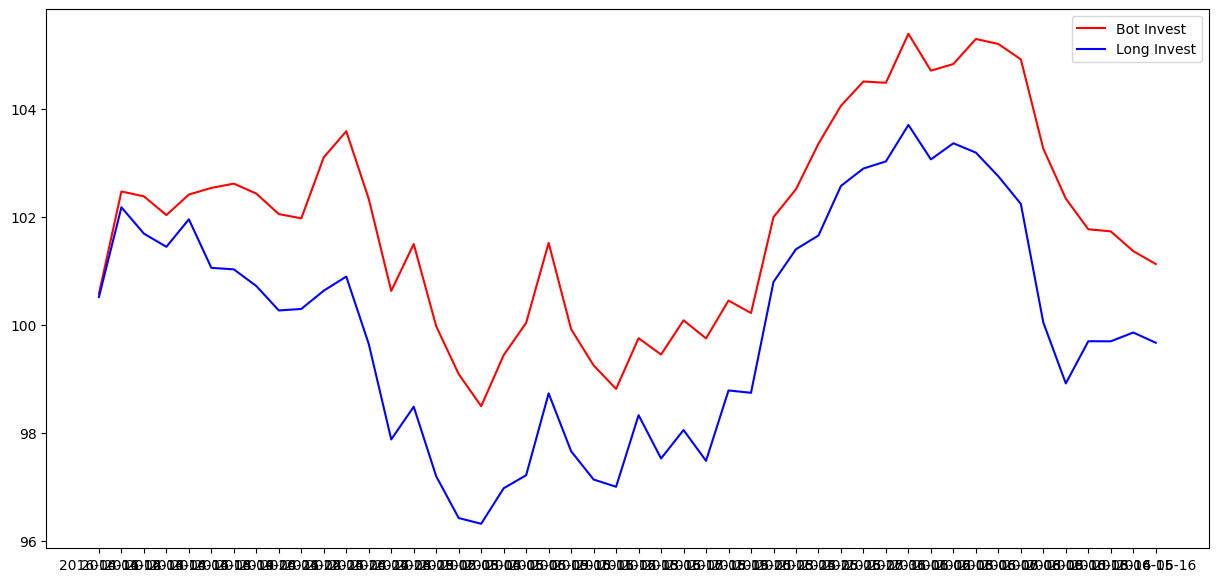

Bot Trading: 101.13 ( 1.13 % )
Long-Term Investment: 99.67 ( -0.33 % )


In [14]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime as dt
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier

stocks = pd.read_csv('data/processed/combined_stock_inputs1.csv')
stocks = stocks.sort_values(['Date', 'Ticker'])

def dater(row):
    date = row['Date']
    date = dt.strptime(date, "%Y-%m-%d")
    return date

stocks['Date_r'] = stocks.apply(dater, axis=1)

d_train = stocks.loc[stocks['Date_r'] < dt(year=2016, month=4, day=10)].reset_index(drop=True)
d_test = stocks.loc[stocks['Date_r'] >= dt(year=2016, month=4, day=10)].reset_index(drop=True)

X_train = d_train[['Sentiment_Weighted', 'Sentiment_MA', 'Tweets', 'Tweets_MA']].values
y_train = d_train['Percent_Change_Bin'].values

X_test = d_test[['Sentiment_Weighted', 'Sentiment_MA', 'Tweets', 'Tweets_MA']].values
y_test = d_test['Percent_Change_Bin'].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('\n')

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print(len(np.where( (preds>0) & (y_test==0) )[0])/len(preds))
print('\n')

d_test['Prediction'] = preds
bot_capital = 100
long_capital = 100
bots = [bot_capital]
longs = [long_capital]

dates = d_test['Date'].sort_values().unique()

for date in dates:
    temp = d_test[d_test['Date']==date]
    long_capital = long_capital + ((long_capital/len(temp)) * (temp['Percent_Change']/100)).sum()
    temp = temp[temp['Prediction']>0]
    bot_capital = bot_capital + ((bot_capital/len(temp)) * (temp['Percent_Change']/100)).sum()
    longs.append(long_capital)
    bots.append(bot_capital)
    
plt.figure(figsize=(15,7))
plt.plot(dates, bots[1:], c='r', label='Bot Invest')
plt.plot(dates, longs[1:], c='b', label='Long Invest')
plt.legend()
plt.show()

print('Bot Trading:', round(bots[-1],2), '(', round((bots[-1]-bots[0])/bots[0]*100,2), '% )')
print('Long-Term Investment:', round(longs[-1],2), '(', round((longs[-1]-longs[0])/longs[0]*100,2), '% )')